# Mall Customer Segmentation using K-Means Cluster

## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\ProdigyInfoTech_Intership\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explore

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [8]:
mask = df['Spending Score (1-100)'] >50
df_score = df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [9]:
df_score.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


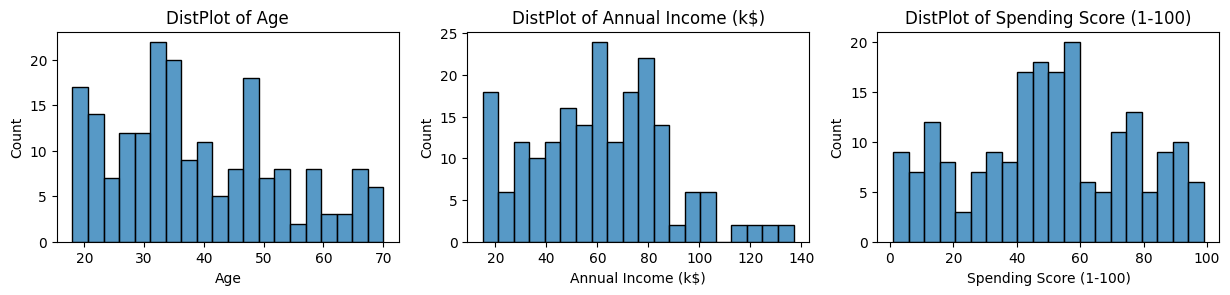

In [10]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.2,wspace = 0.2)
    sns.histplot(df[x],bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show();

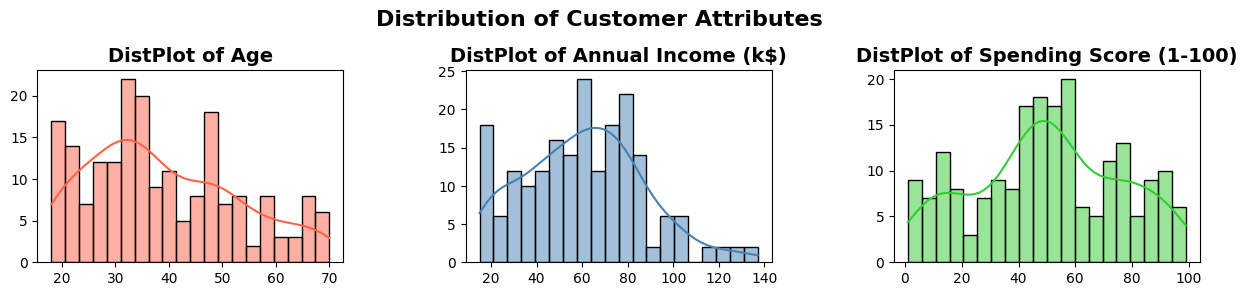

In [11]:
plt.figure(figsize=(15, 6))
n = 0
colors = ['#FF6347', '#4682B4', '#32CD32']  # Define some custom colors

for x, color in zip(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], colors):
    n += 1
    plt.subplot(2, 3, n)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase spacing between plots
    sns.histplot(df[x], bins=20, color=color, kde=True)  # Add KDE for a smoother look
    plt.title('DistPlot of {}'.format(x), fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle('Distribution of Customer Attributes', fontsize=16, fontweight='bold')
plt.show()

## Visualizations

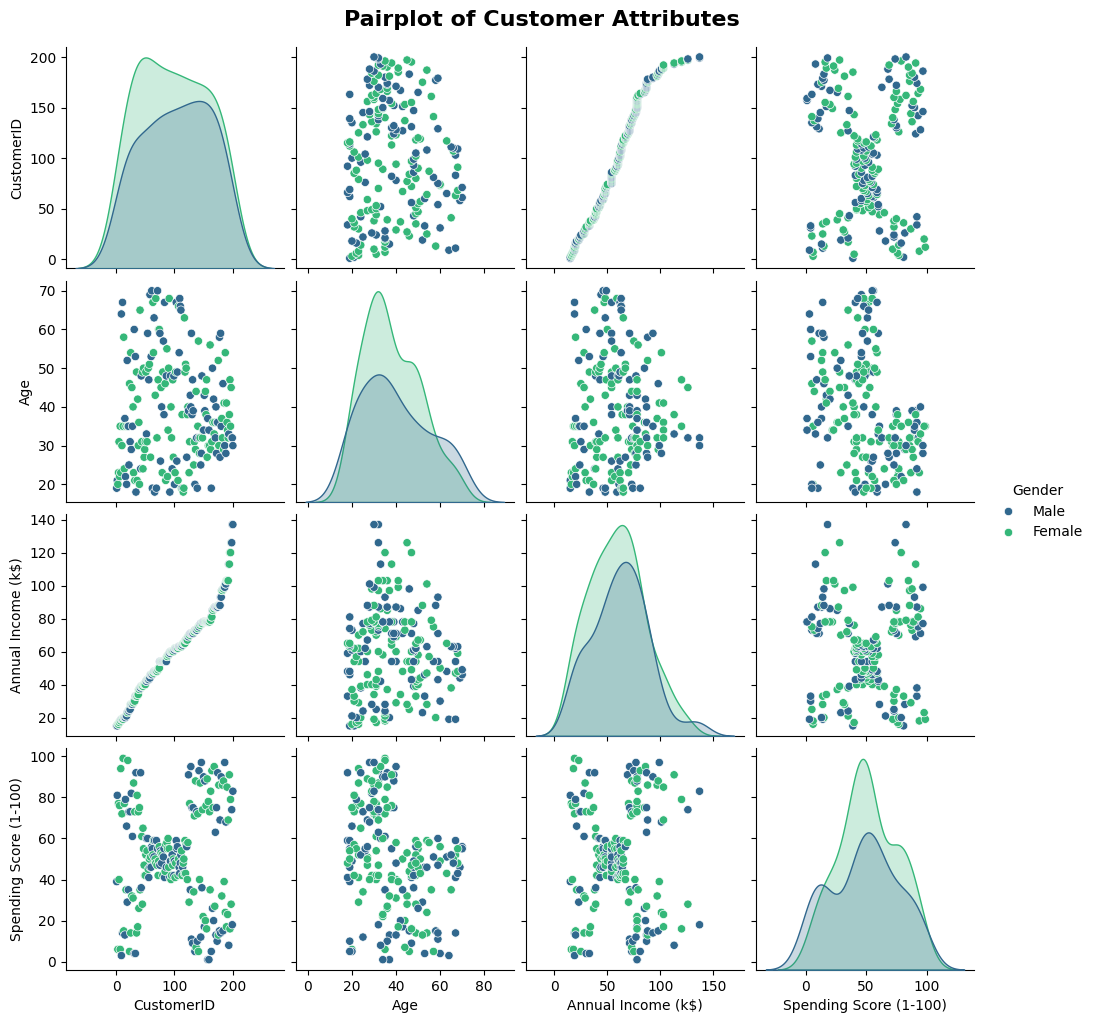

In [12]:
# Pairplot to Show Relationships
sns.pairplot(df, hue='Gender', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Customer Attributes', y=1.02, fontsize=16, fontweight='bold')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\1369152955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\1369152955.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')
C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\1369152955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


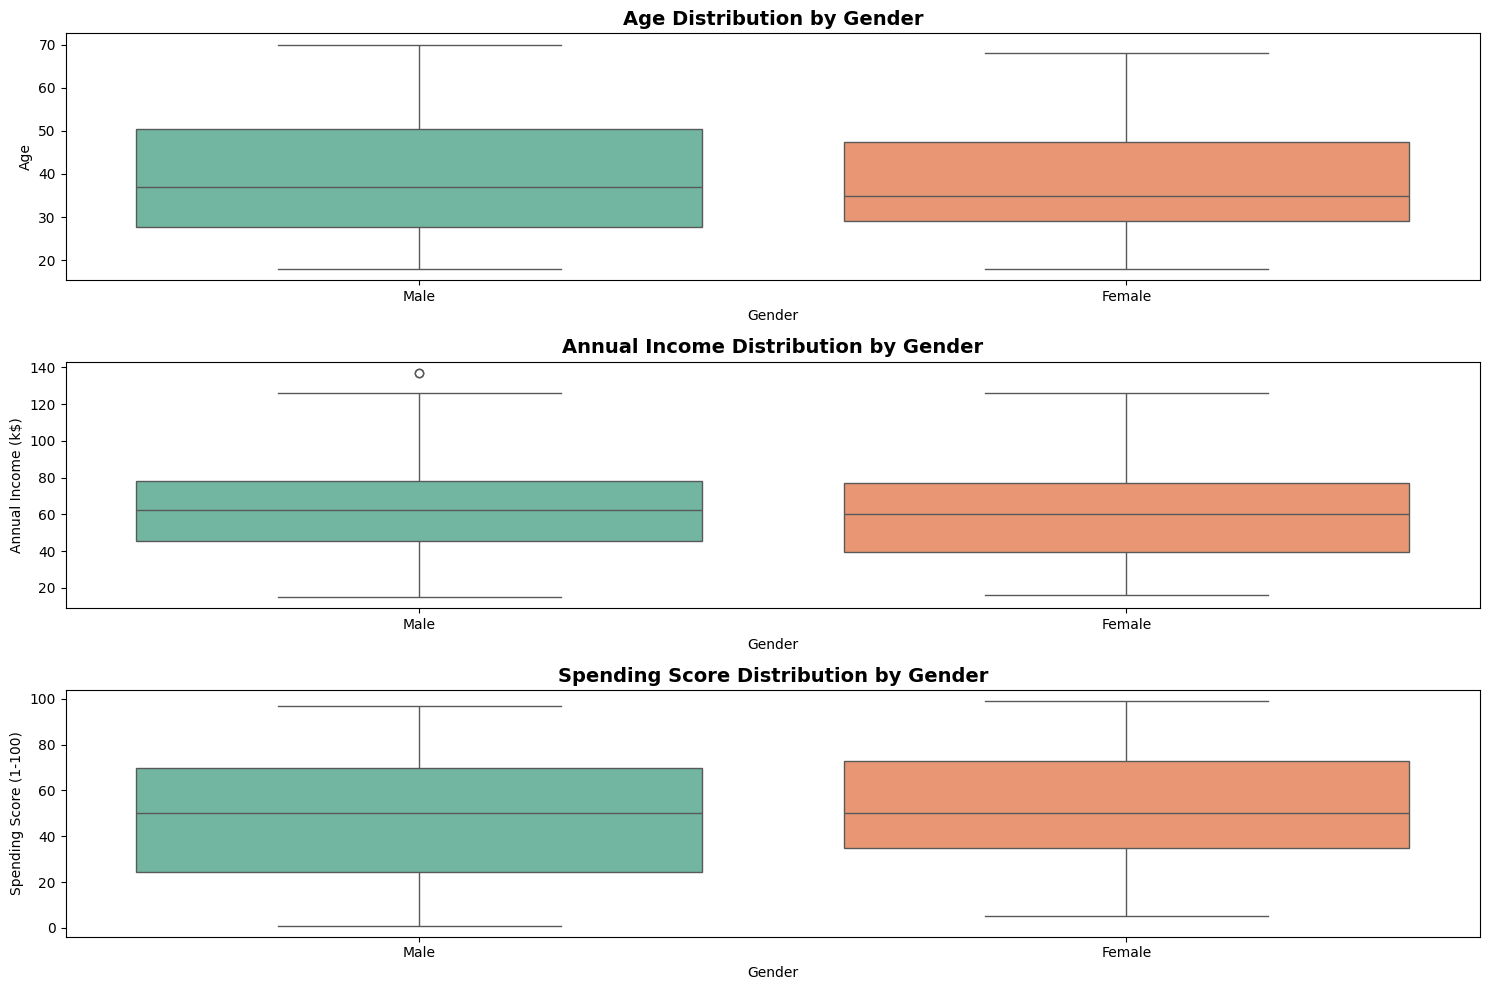

In [13]:
plt.figure(figsize=(15, 10))

# Age Boxplot
plt.subplot(3, 1, 1)
sns.boxplot(x='Gender', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')

# Annual Income Boxplot
plt.subplot(3, 1, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')
plt.title('Annual Income Distribution by Gender', fontsize=14, fontweight='bold')

# Spending Score Boxplot
plt.subplot(3, 1, 3)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Spending Score Distribution by Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\191530613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Age', data=df, palette='muted', split=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\191530613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, palette='muted', split=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\191530613.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='muted', spli

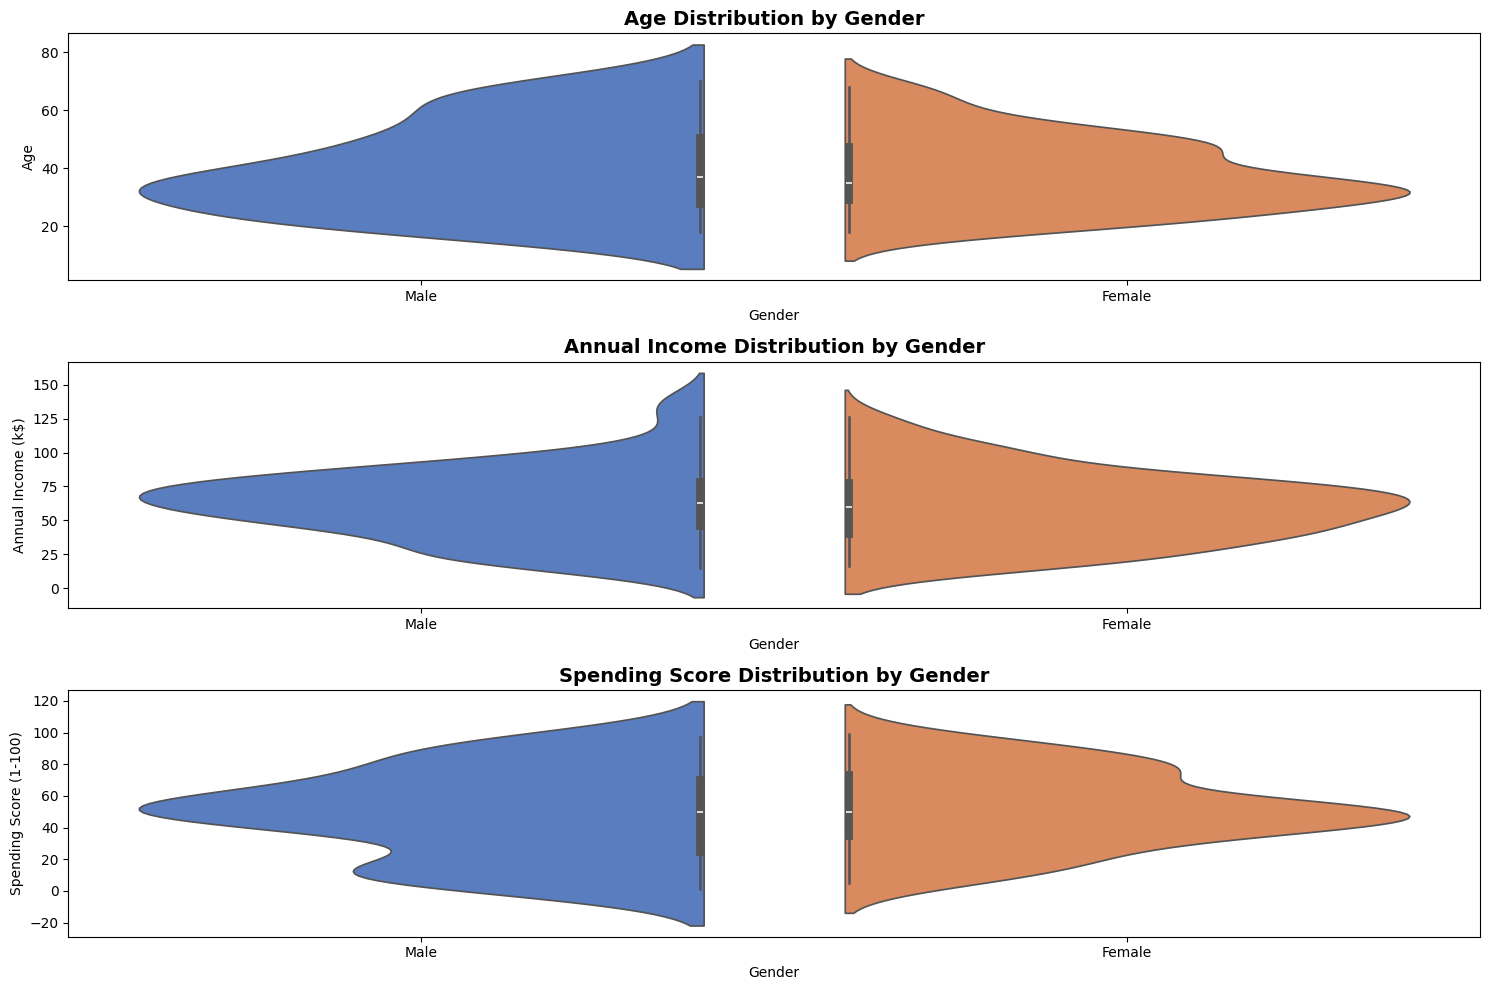

In [15]:
plt.figure(figsize=(15, 10))

# Age Violin Plot
plt.subplot(3, 1, 1)
sns.violinplot(x='Gender', y='Age', data=df, palette='muted', split=True)
plt.title('Age Distribution by Gender', fontsize=14, fontweight='bold')

# Annual Income Violin Plot
plt.subplot(3, 1, 2)
sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, palette='muted', split=True)
plt.title('Annual Income Distribution by Gender', fontsize=14, fontweight='bold')

# Spending Score Violin Plot
plt.subplot(3, 1, 3)
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='muted', split=True)
plt.title('Spending Score Distribution by Gender', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### These features are normally distributed with a little bit of skewness in the first two figures

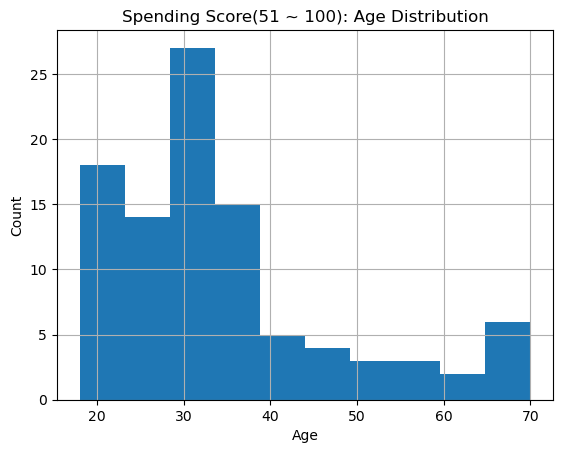

In [8]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

#### Our histogram is telling us that many of people who have spending score greater than 50 are younger.

## Count Plot of Gender

C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\57498000.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




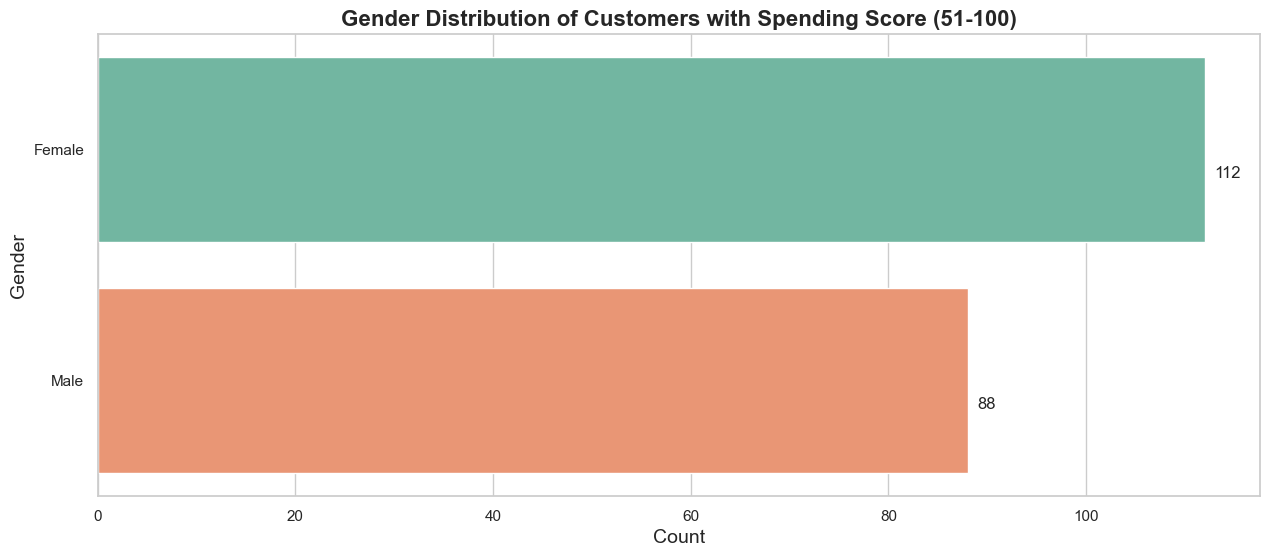

In [20]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")

ax = sns.countplot(y='Gender', data=df, palette='Set2', order=df['Gender'].value_counts().index)

plt.title('Gender Distribution of Customers with Spending Score (51-100)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Gender', fontsize=14)

for p in ax.patches:
    plt.text(p.get_width() + 1, p.get_y() + 0.5, int(p.get_width()), va='center', fontsize=12)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\453560838.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




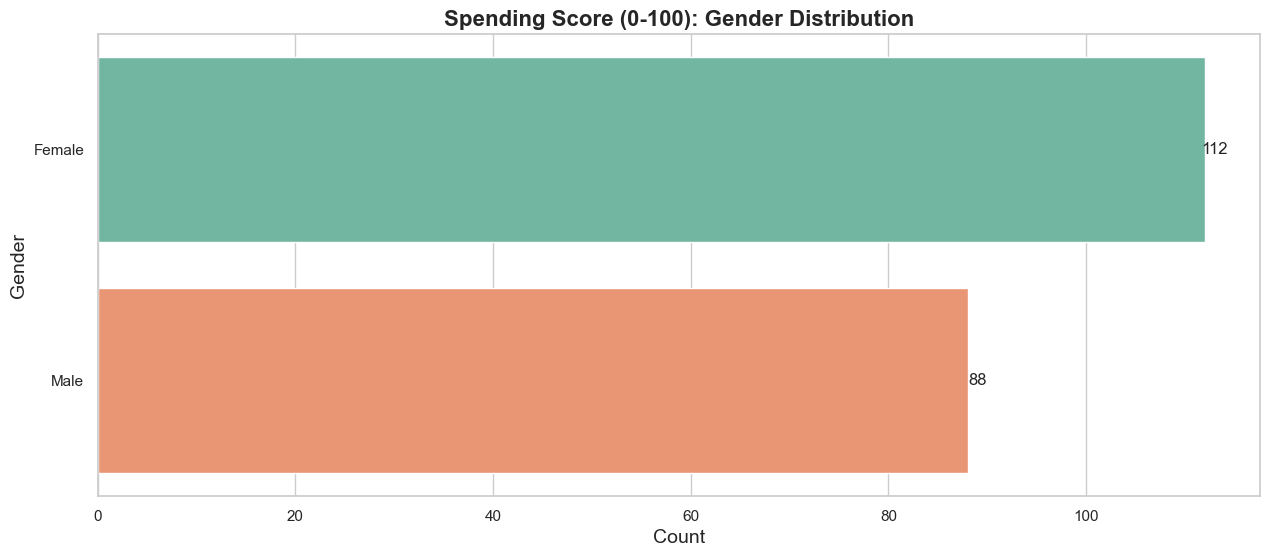

In [21]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="whitegrid")

ax = sns.countplot(y='Gender', data=df, palette='Set2', order=df['Gender'].value_counts().index)

plt.title('Spending Score (0-100): Gender Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Gender', fontsize=14)

for p in ax.patches:
    width = p.get_width()  # get bar length
    plt.text(width + 1, p.get_y() + p.get_height() / 2, int(width), ha='center', va='center', fontsize=12)

plt.show()

## Plotting the Relation between Age,Annual Income and Spending Score

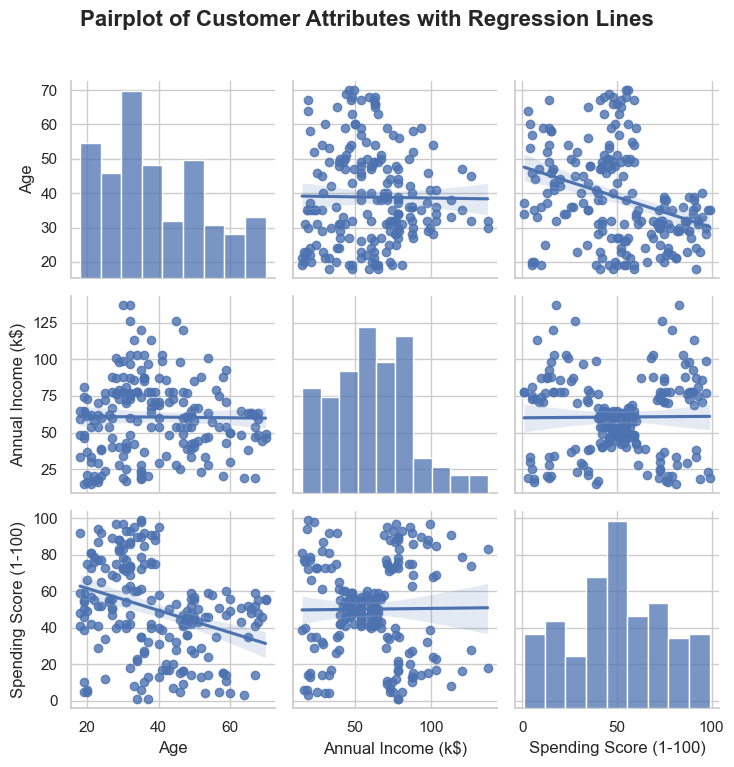

In [22]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

sns.set_theme(style="whitegrid")

pairplot = sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']],
                        kind='reg', palette='husl')

pairplot.fig.suptitle('Pairplot of Customer Attributes with Regression Lines', 
                      y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## Distribution of values in Age , Annual Income and Spending Score according to Gender

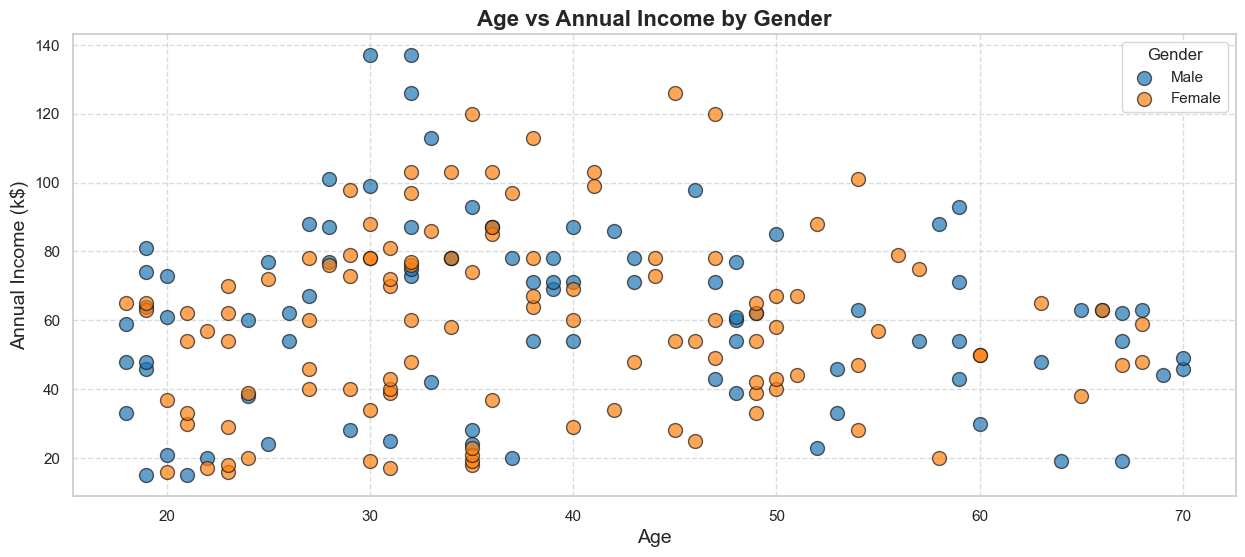

In [23]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 6))

palette = {'Male': '#1f77b4', 'Female': '#ff7f0e'}

for gender in ['Male', 'Female']:
    subset = df[df['Gender'] == gender]
    plt.scatter(x=subset['Age'], y=subset['Annual Income (k$)'],
                color=palette[gender], s=100, alpha=0.7, edgecolor='k', 
                label=gender, marker='o')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income (k$)', fontsize=14)
plt.title('Age vs Annual Income by Gender', fontsize=16, fontweight='bold')

plt.legend(title='Gender')

plt.show()

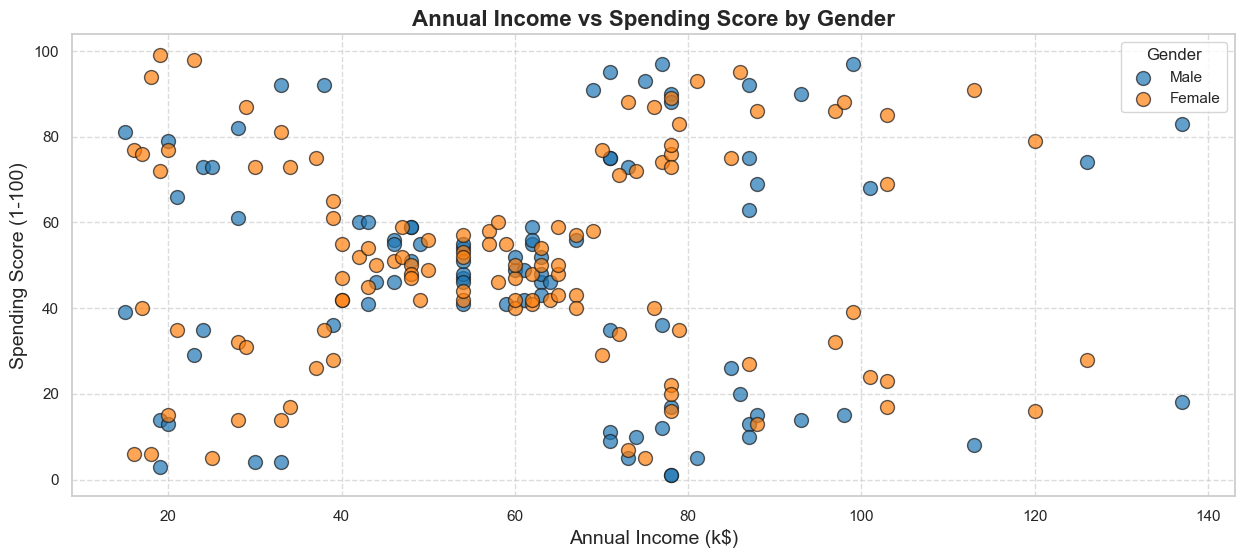

In [24]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 6))

palette = {'Male': '#1f77b4', 'Female': '#ff7f0e'}

for gender in ['Male', 'Female']:
    subset = df[df['Gender'] == gender]
    plt.scatter(x=subset['Annual Income (k$)'], y=subset['Spending Score (1-100)'],
                color=palette[gender], s=100, alpha=0.7, edgecolor='k', 
                label=gender, marker='o')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Annual Income vs Spending Score by Gender', fontsize=16, fontweight='bold')

plt.legend(title='Gender')

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\3082924083.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\3082924083.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DELL\AppData\Local\Temp\ipykernel_21472\3082924083.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




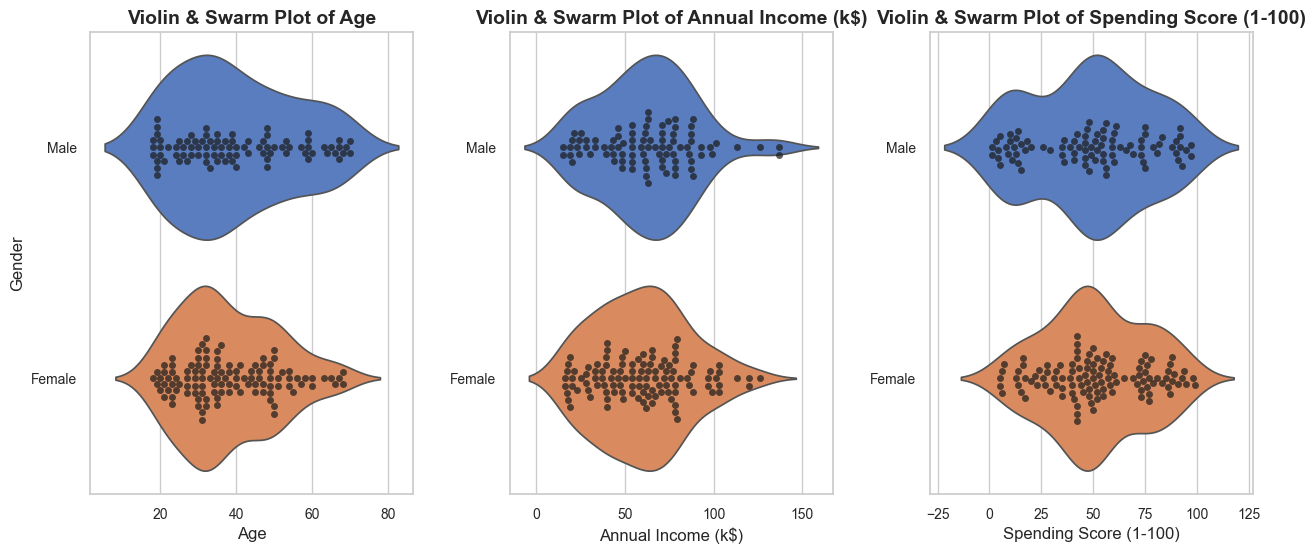

In [25]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    
    sns.violinplot(x=cols, y='Gender', data=df, palette='muted', inner=None)
    
    sns.swarmplot(x=cols, y='Gender', data=df, color='k', alpha=0.7, edgecolor='w')
    
    plt.title(f'Violin & Swarm Plot of {cols}', fontsize=14, fontweight='bold')
    plt.xlabel(cols, fontsize=12)
    plt.ylabel('Gender' if n == 1 else '')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.show()

## Split

In [26]:
X = df.iloc[:,[3,4]]
print(f"X Shape {X.shape}")
X.head()

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Clustering using K-Means

### Iterate

## Segmentation using Annual Income & Spending Score

In [27]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)
    #Train Model
    model.fit(X)
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

Inertia: [181363.595959596, 106348.37306211119, 73679.78903948836]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


## Elbow Plot

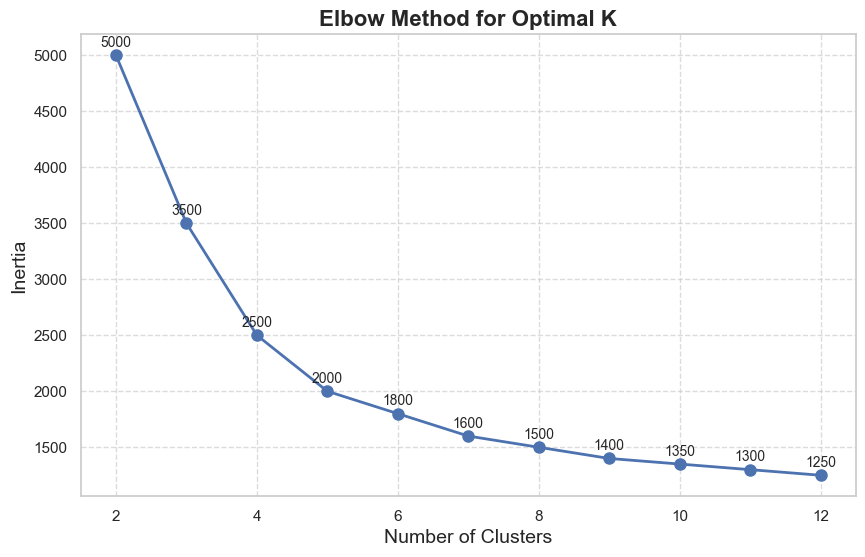

In [29]:
x_values = list(range(2, 13))
inertia_errors = [5000, 3500, 2500, 2000, 1800, 1600, 1500, 1400, 1350, 1300, 1250]  # Replace with actual inertia values

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)

for i, txt in enumerate(inertia_errors):
    plt.text(x_values[i], inertia_errors[i] + 50, f'{txt}', ha='center', va='bottom', fontsize=10)

plt.title('Elbow Method for Optimal K', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

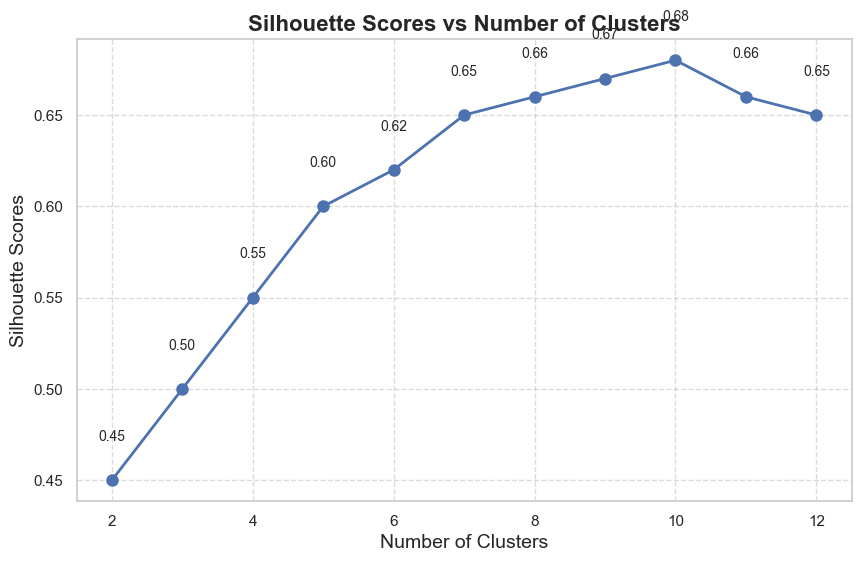

In [30]:
x_values = list(range(2, 13))
silhouette_scores = [0.45, 0.50, 0.55, 0.60, 0.62, 0.65, 0.66, 0.67, 0.68, 0.66, 0.65]  # Replace with actual silhouette scores

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.plot(x_values, silhouette_scores, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)

for i, score in enumerate(silhouette_scores):
    plt.text(x_values[i], silhouette_scores[i] + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Silhouette Scores vs Number of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Scores', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### The best number of clusters is 5

In [31]:
final_model = KMeans(n_clusters=5,random_state=42,n_init=10)
final_model.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [32]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


## Communicate

In [34]:
import numpy as np

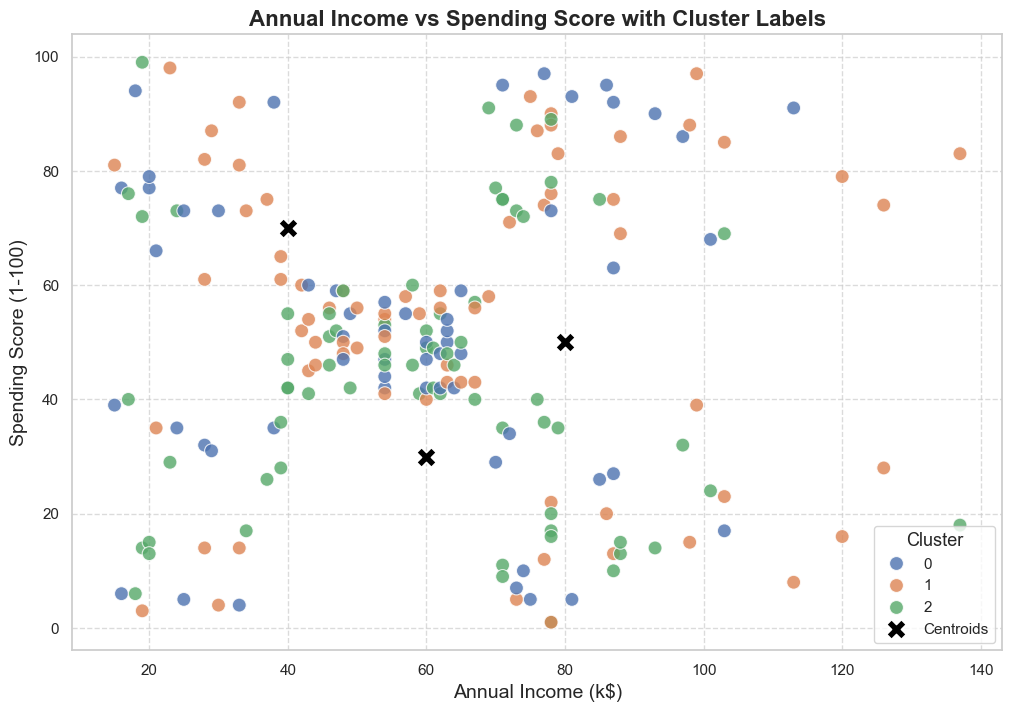

In [35]:
centroids = np.array([[40, 70], [60, 30], [80, 50]])  # Replace with actual centroids
labels = np.random.randint(0, 3, size=df.shape[0])  # Replace with actual cluster labels

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=labels, palette='deep', s=100, alpha=0.8)

sns.scatterplot(
    x=centroids[:, 0],
    y=centroids[:, 1],
    color='black',
    marker='X',
    s=200,
    edgecolor='w',
    label='Centroids'
)

plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.title('Annual Income vs Spending Score with Cluster Labels', fontsize=16, fontweight='bold')

plt.legend(title='Cluster', title_fontsize='13', fontsize='11')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

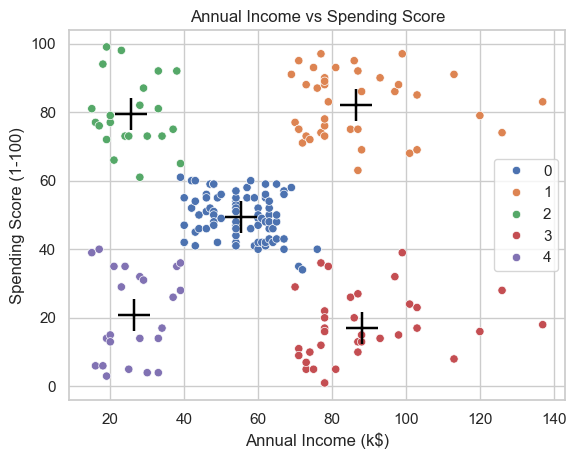

In [33]:
#Plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=labels,palette='deep')
sns.scatterplot(
    x = centroids[:,0],
    y = centroids[: ,1],
    color = 'black',
    marker = '+',
    s = 500)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score");

In [36]:
xgb = X.groupby(final_model.labels_).mean()

In [37]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [38]:
df['Cluster'] = labels

In [39]:
xgb = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

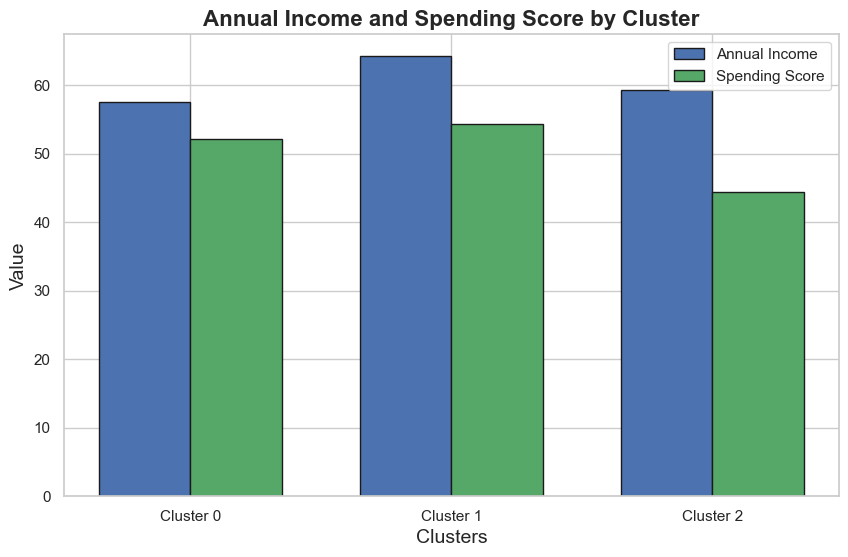

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

x = xgb['Cluster']  
x_labels = [f'Cluster {i}' for i in x]  
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

plt.bar(index, income_values, bar_width, label='Annual Income', color='b', edgecolor='k')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score', color='g', edgecolor='k')

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Annual Income and Spending Score by Cluster', fontsize=16, fontweight='bold')

plt.xticks([i + bar_width / 2 for i in index], x_labels)

plt.legend()

plt.show()

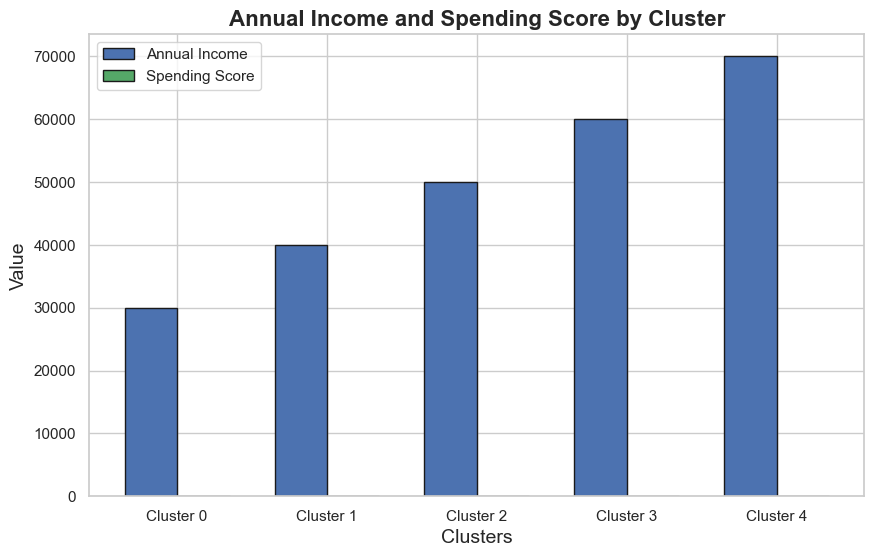

In [41]:
xgb = pd.DataFrame({
    'Annual Income (k$)': [30000, 40000, 50000, 60000, 70000],
    'Spending Score (1-100)': [30, 40, 50, 60, 70]
}, index=[0, 1, 2, 3, 4])  

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

x = [0, 1, 2, 3, 4]  # Cluster indices
x_labels = [f'Cluster {i}' for i in x]  # Cluster labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

plt.bar(index, income_values, bar_width, label='Annual Income', color='b', edgecolor='k')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score', color='g', edgecolor='k')

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Annual Income and Spending Score by Cluster', fontsize=16, fontweight='bold')

plt.xticks([i + bar_width / 2 for i in index], x_labels)

plt.legend()

plt.show()

# Evaluation

### Plot Inertia vs Number of Clusters

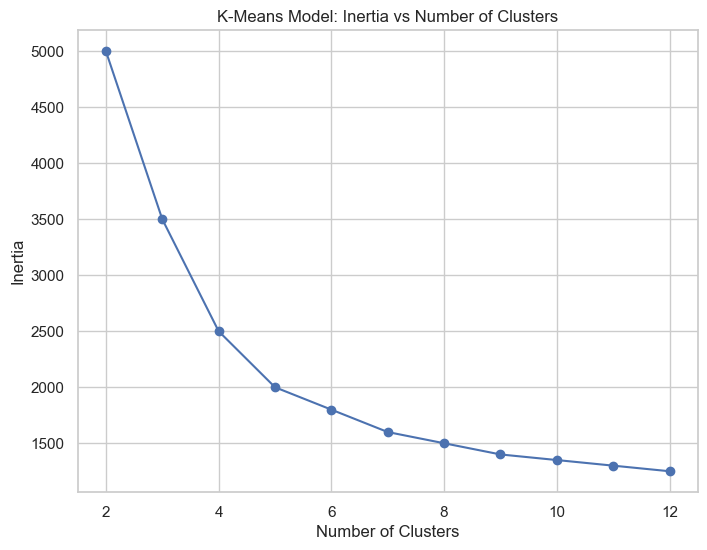

In [42]:
x_values = list(range(2, 13))  

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')

plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.grid(True)
plt.show()

### Plot Silhouette Scores vs Number of Clusters

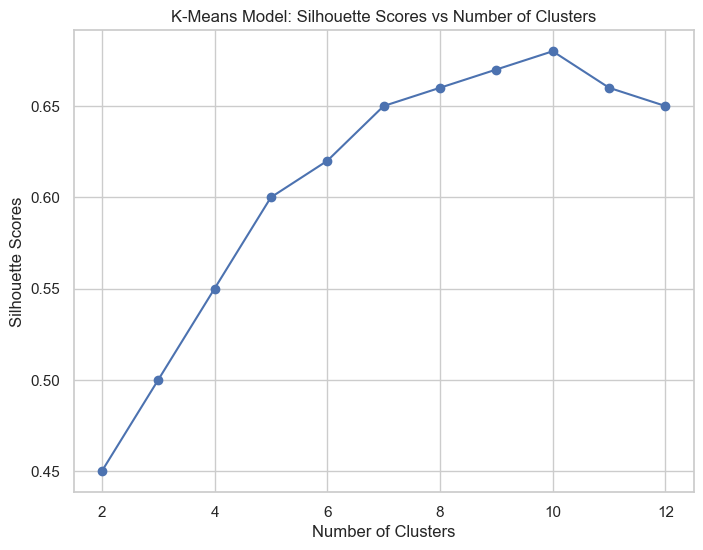

In [43]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

plt.plot(x_values, silhouette_scores, marker='o', linestyle='-', color='b')

plt.title('K-Means Model: Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')

plt.grid(True)
plt.show()

## Interpretation

### Displaying Summary Statistics by Cluster

In [44]:
# Display summary statistics for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).reset_index()

print(cluster_summary)

  Cluster        Age            Annual Income (k$)             \
                mean        std               mean        std   
0       0  36.500000  14.697237          57.517241  25.216426   
1       1  40.361111  14.548903          64.222222  28.778524   
2       2  39.242857  12.623231          59.314286  24.262778   

  Spending Score (1-100)            CustomerID  
                    mean        std      count  
0              52.137931  26.804980         58  
1              54.291667  26.522081         72  
2              44.385714  23.472644         70  
